<a href="https://colab.research.google.com/github/tomonari-masada/course2021-stats2/blob/main/01_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. イントロダクション
* キャメロン・デビッドソン=ピロン(著), 玉木徹(訳)：『Pythonで体験するベイズ推論:PyMCによるMCMC入門』, 森北出版 (2017)
 * https://www.amazon.co.jp/dp/4627077912
* リポジトリ
 * https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

## 1.1 ベイズ的な考え方

### 1.1.1 ベイズ則

$P(A|X)=\frac{P(X|A)P(A)}{P(X)}$

$P(A|X) \propto P(X|A)P(A)$

### 1.1.2 ベイズ則の例題：司書か農業家か？
* 問題設定
 * スティーブは内向的な性格。彼が司書になりそうだという結論には、多くの人が同意するだろう。
 * だが、司書と農業家の比率は1:20で、農業家の方が司書より20倍多い。
---

* スティーブが司書であるという事象を$A$とする。スティーブについて何の情報もなければ、$P(A)=\frac{1}{21}=0.047$である。
 * これが事前確率である。
---

* 近所の住人から、彼が内向的だとの情報（この情報を$X$とする）を得た。考えたいのは$P(A|X)$である。
 * これが事後確率である。
---
ベイズ則：　$P(A|X)=\frac{P(X|A)P(A)}{P(X)}$
* $P(X|A)$について
 * $P(X|A)$はスティーブが司書である場合に近所の住人が彼は内向的だと語る確率。これは非常に高いだろう。
 * そこで、0.95とする。
* $P(X)$について
 * $P(X)=P(X|A)P(A)+P(X|\neg A)P(\neg A)$と分解できる。
 * $P(X|\neg A)$はスティーブが農業家である場合に近所の人が彼は内向的だと語る確率。0.5だとしよう。
 * すると、
$P(X)=0.95 \times \frac{1}{21} + 0.5 \times \frac{20}{21} = 0.52$を得る。
* 以上より、
$P(A|X) = \frac{0.95 \times \frac{1}{21}}{0.52} = 0.087$という結果を得る。


In [1]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt

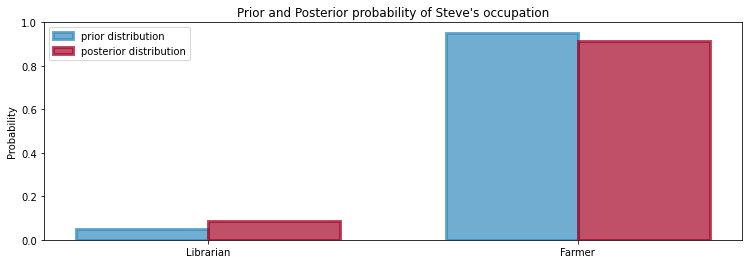

In [8]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

LEFT = 0.0
RIGHT = 0.7
WIDTH = 0.25

prior = [1/21, 20/21]
posterior = [0.087, 1 - 0.087]
plt.bar([LEFT, RIGHT], prior, alpha=0.70, width=WIDTH,
        color=colours[0], label="prior distribution",
        lw="3", edgecolor=colours[0])

plt.bar([LEFT+WIDTH, RIGHT+WIDTH], posterior, alpha=0.7,
        width=WIDTH, color=colours[1],
        label="posterior distribution",
        lw="3", edgecolor=colours[1])

plt.xticks([LEFT+WIDTH/2, RIGHT+WIDTH/2], ["Librarian", "Farmer"])
plt.title("Prior and Posterior probability of Steve's occupation")
plt.ylabel("Probability")
plt.legend(loc="upper left")

### 1.1.3 ベイズ的なデータ・モデリングにおけるベイズ則の使われ方
* ベイズ的なデータモデリングでは、$A$は確率分布のパラメータ、$X$は観測されたデータである。
 * $X$はすでに分かっているものである。
 * $A$は我々が直接知ることができないものである。
---
* $P(A)$はモデルのパラメータが従う確率分布で、事前分布(prior distribution)と呼ばれる。
* $P(X|A)$は観測データの尤度(likelihood)。
* $P(X)$は観測データの周辺尤度（marginal likelihood, evidence）。
* $P(A|X)$もモデルのパラメータが従う確率分布で、事後分布と呼ばれる。
---
* データのモデリングに使われる確率分布のパラメータについて、それが従う分布を考えるのがベイズ的なモデリングの特徴。
 * 分布の分布を考えるのがベイズ的なモデリングの特徴。

### 1.1.4 統計モデリング1の復習
* コイン投げ
 * 表が出た回数のモデリングには二項分布を使う。
 * 二項分布のパラメータが従う分布としては、二項分布の共役事前分布であるベータ分布を使う。

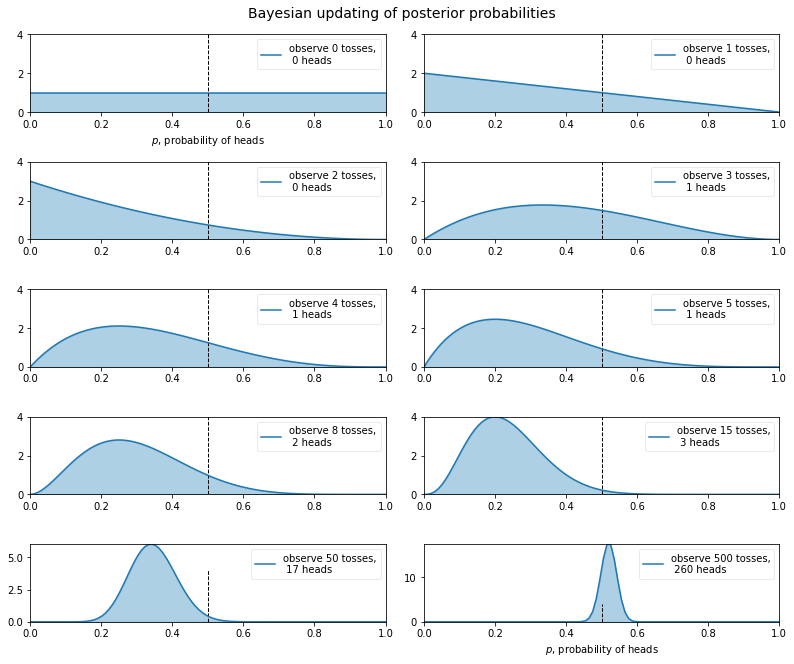

In [10]:
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# 二項分布にとって共役な事前分布であるベータ分布を使っている
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    #plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

## 1.2 確率分布